# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style = 'darkgrid', palette= 'viridis')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Dataset
   # Zoo
   

In [2]:
df = pd.read_csv(r"C:\Users\ahmed\Downloads\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# EDA

In [3]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.duplicated().sum()

0

<Axes: >

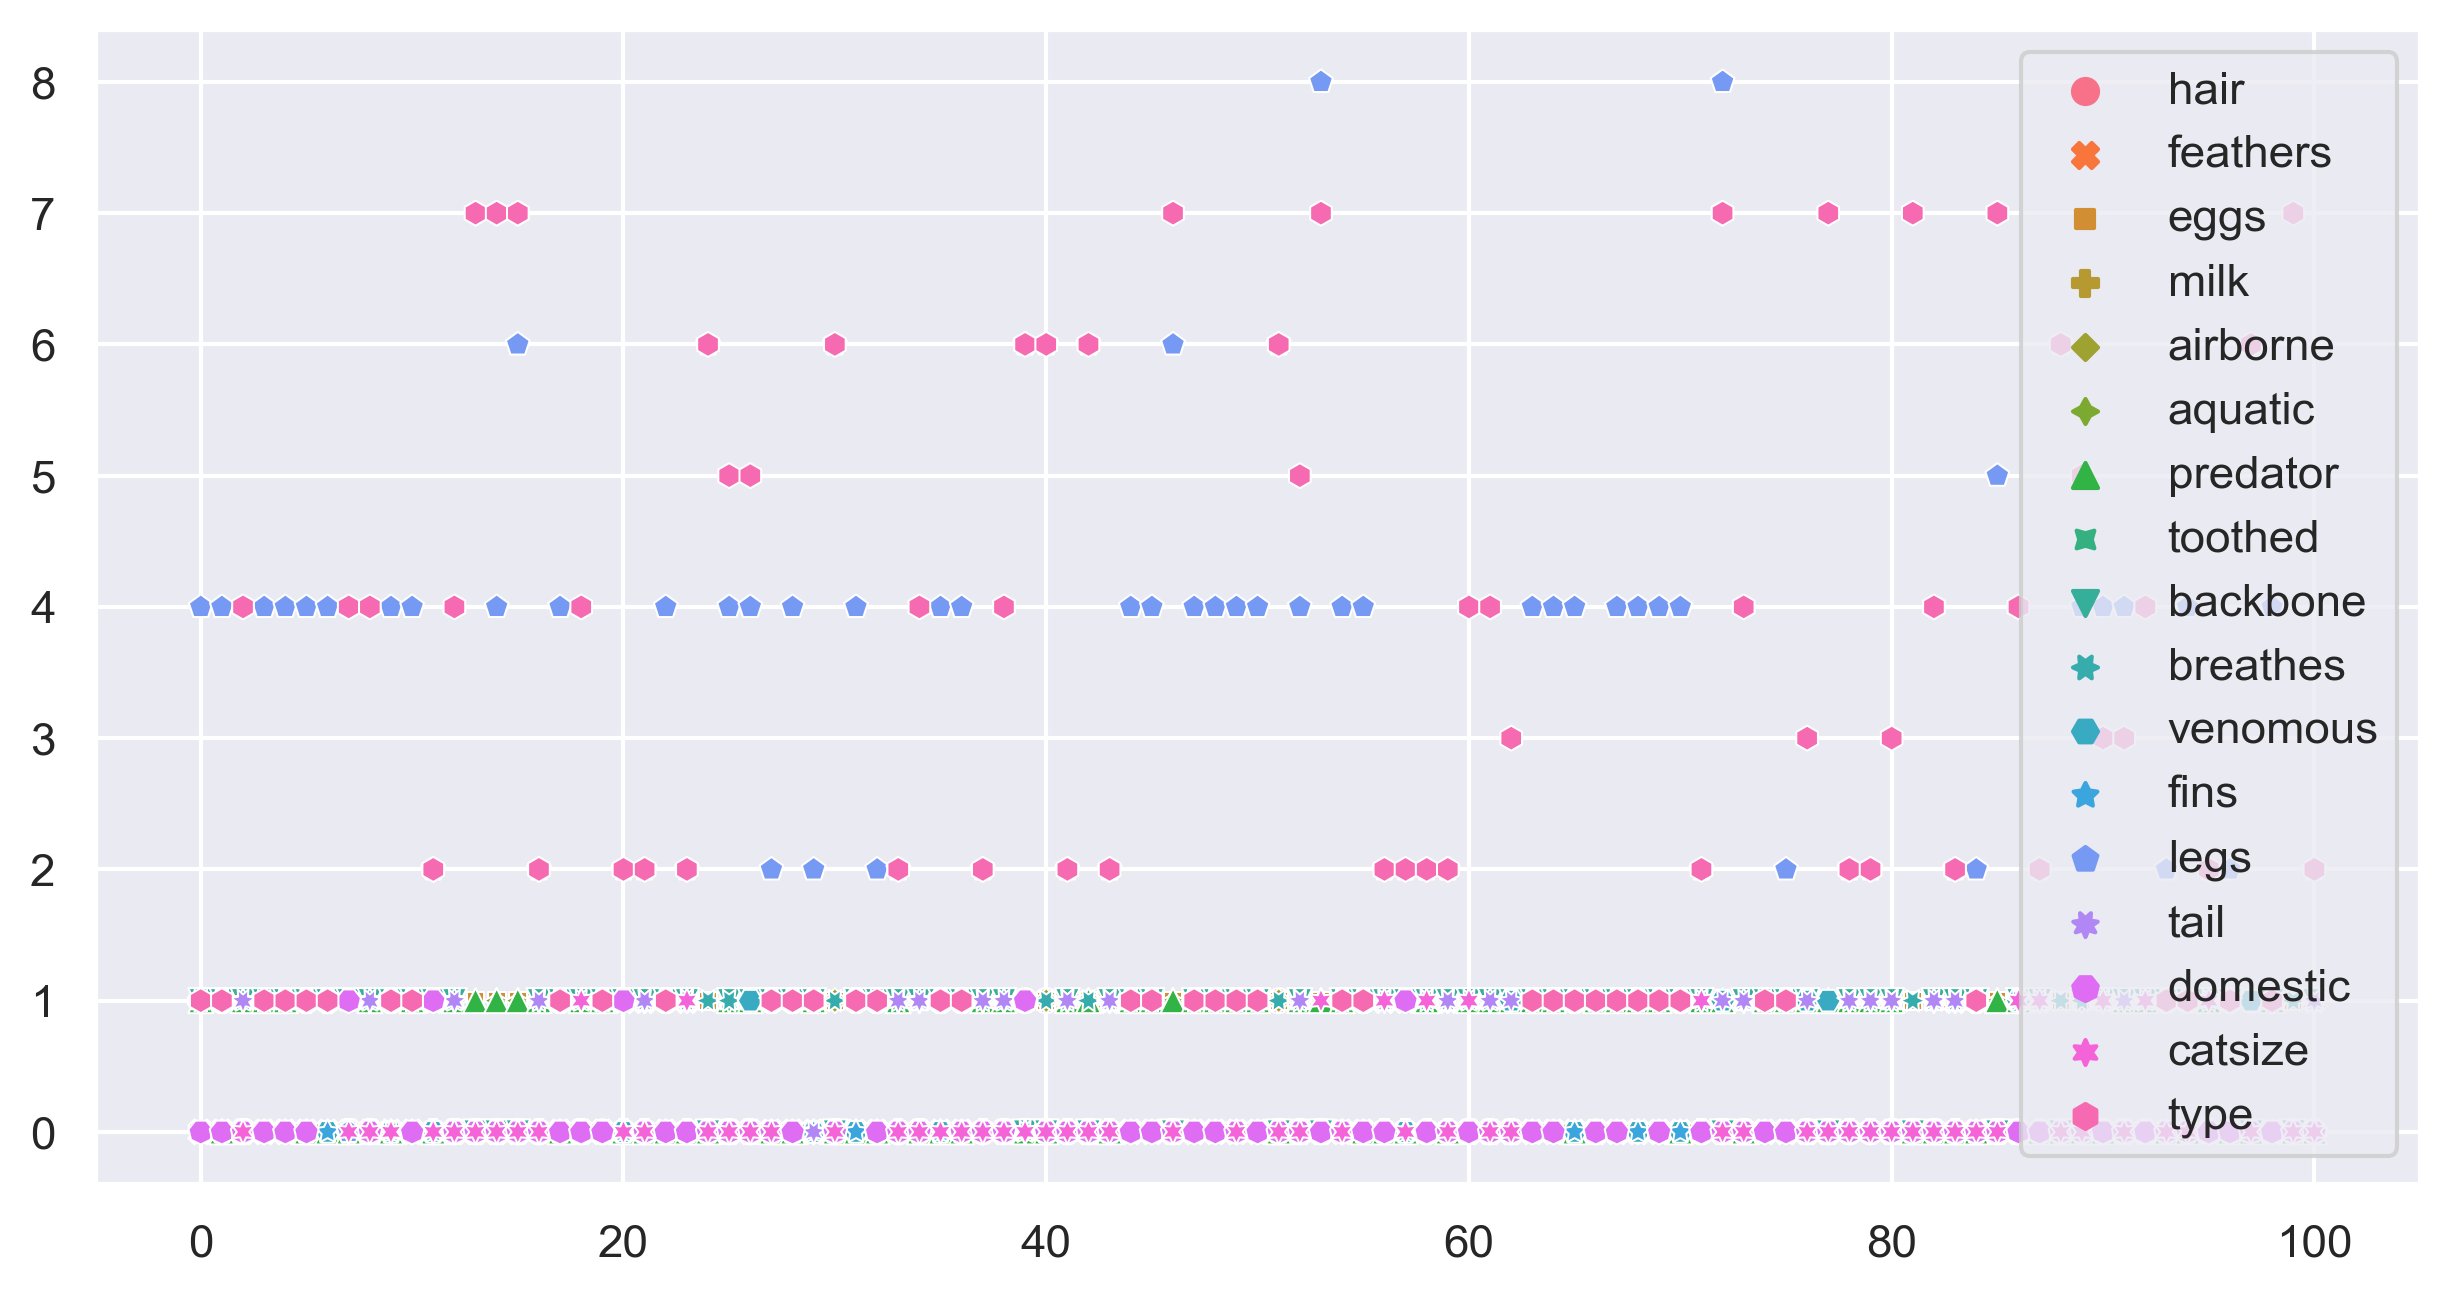

In [6]:
sns.scatterplot(df)

<Axes: >

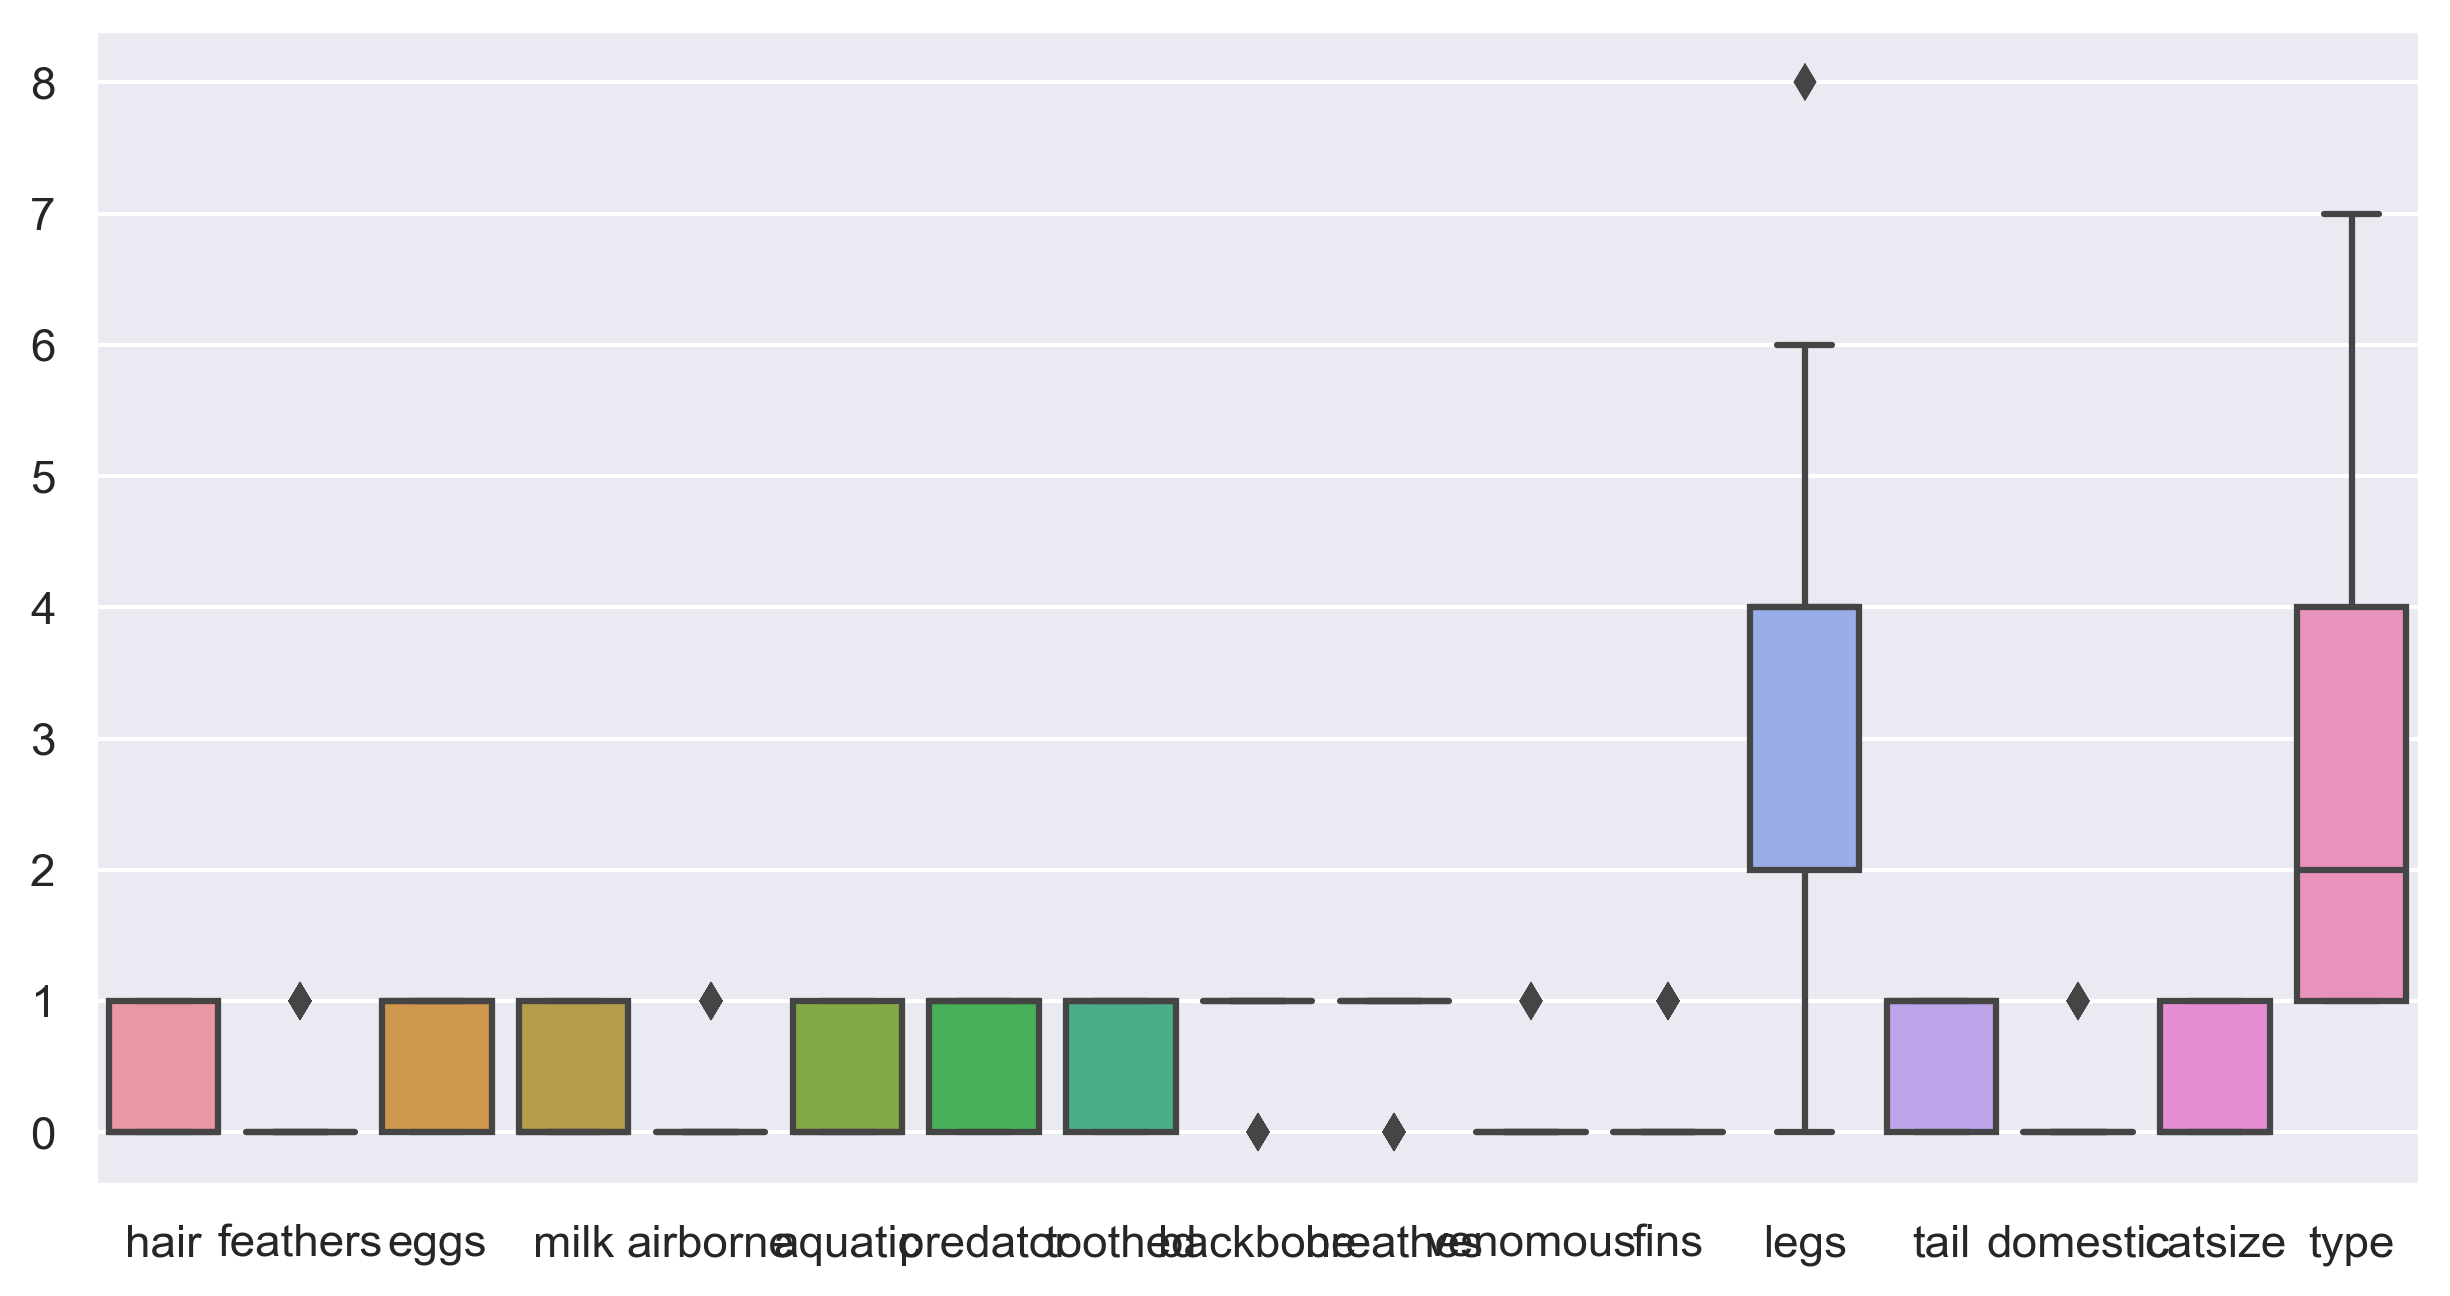

In [7]:
sns.boxplot(df)

In [8]:
zoo = df.iloc[:,1:]
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Model Building

# Standardizing dataset

In [9]:
sc = StandardScaler()

zoo.iloc[:,:-1] = sc.fit_transform(zoo.iloc[:,:-1])
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,1
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,1
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,4
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,1
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180,1
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595,6
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,1
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595,7


# Splitting the Data into Train & Test

In [10]:
x = zoo.iloc[:,:-1]
y = zoo['type']

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [12]:
KNN = KNeighborsClassifier(n_neighbors= 3)
KNN.fit(xtrain,ytrain)
ypred = KNN.predict(xtest)
print("Training score :" , KNN.score(xtrain,ytrain))
print("Testing score :" , KNN.score(xtest,ytest))

Training score : 0.975
Testing score : 1.0


In [13]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [14]:
# Well we have created a robust Model

# Glass

In [15]:
df = pd.read_csv(r"C:\Users\ahmed\Downloads\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA

In [16]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: >

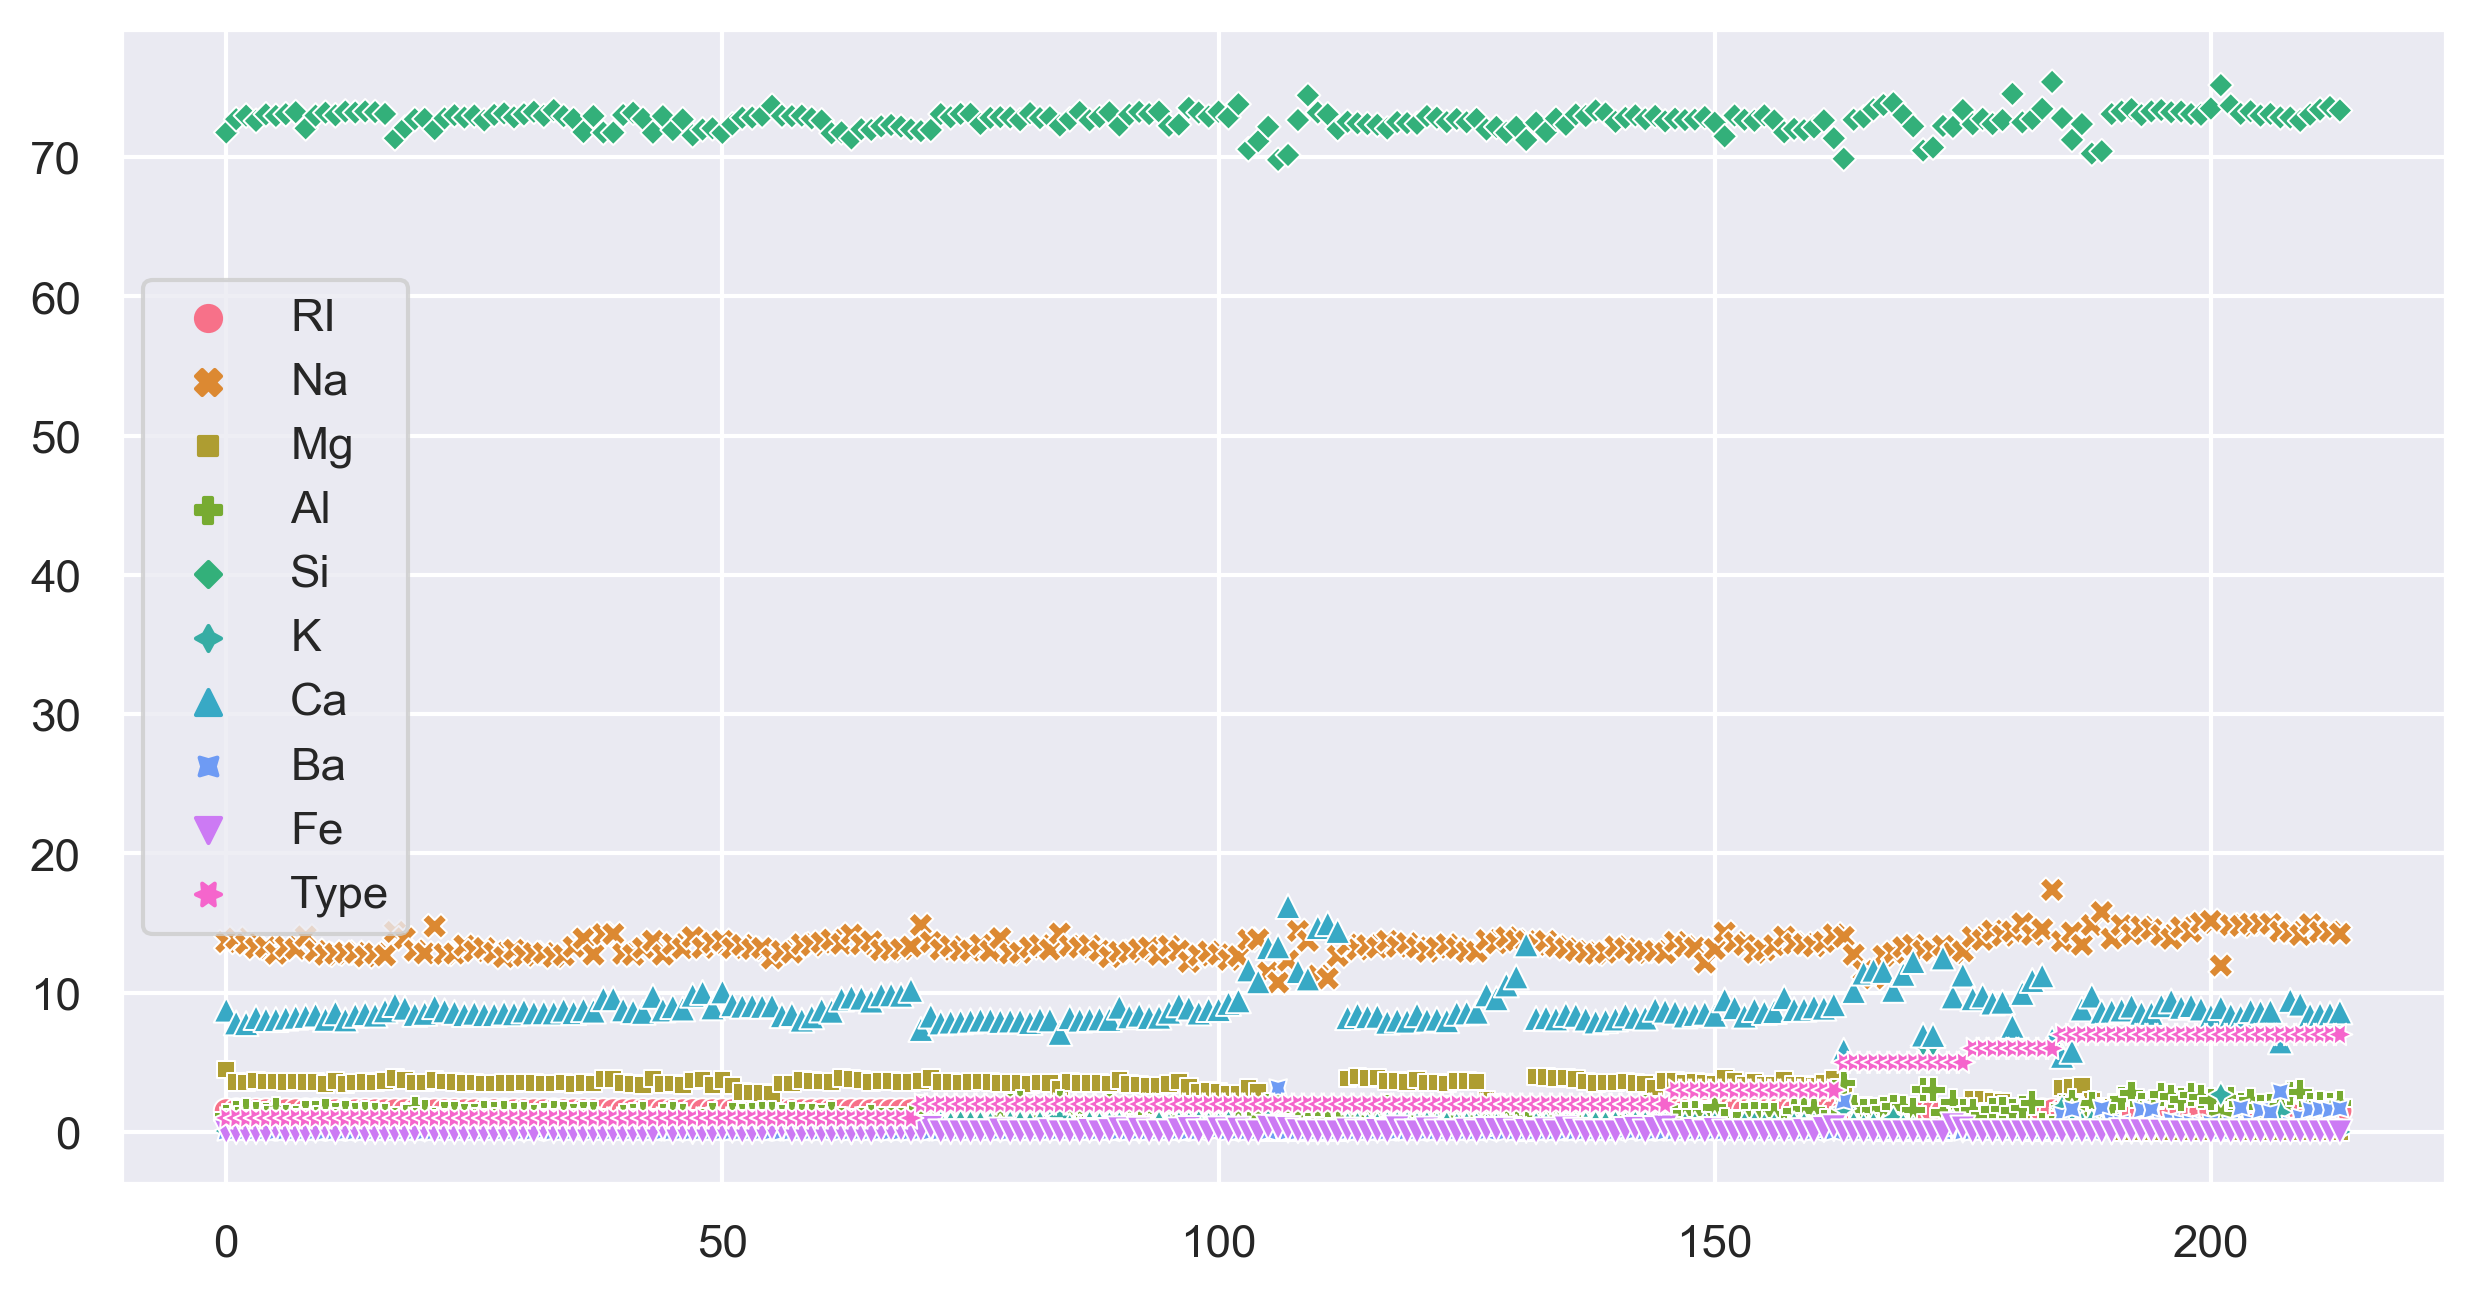

In [17]:
sns.scatterplot(df)

<Axes: >

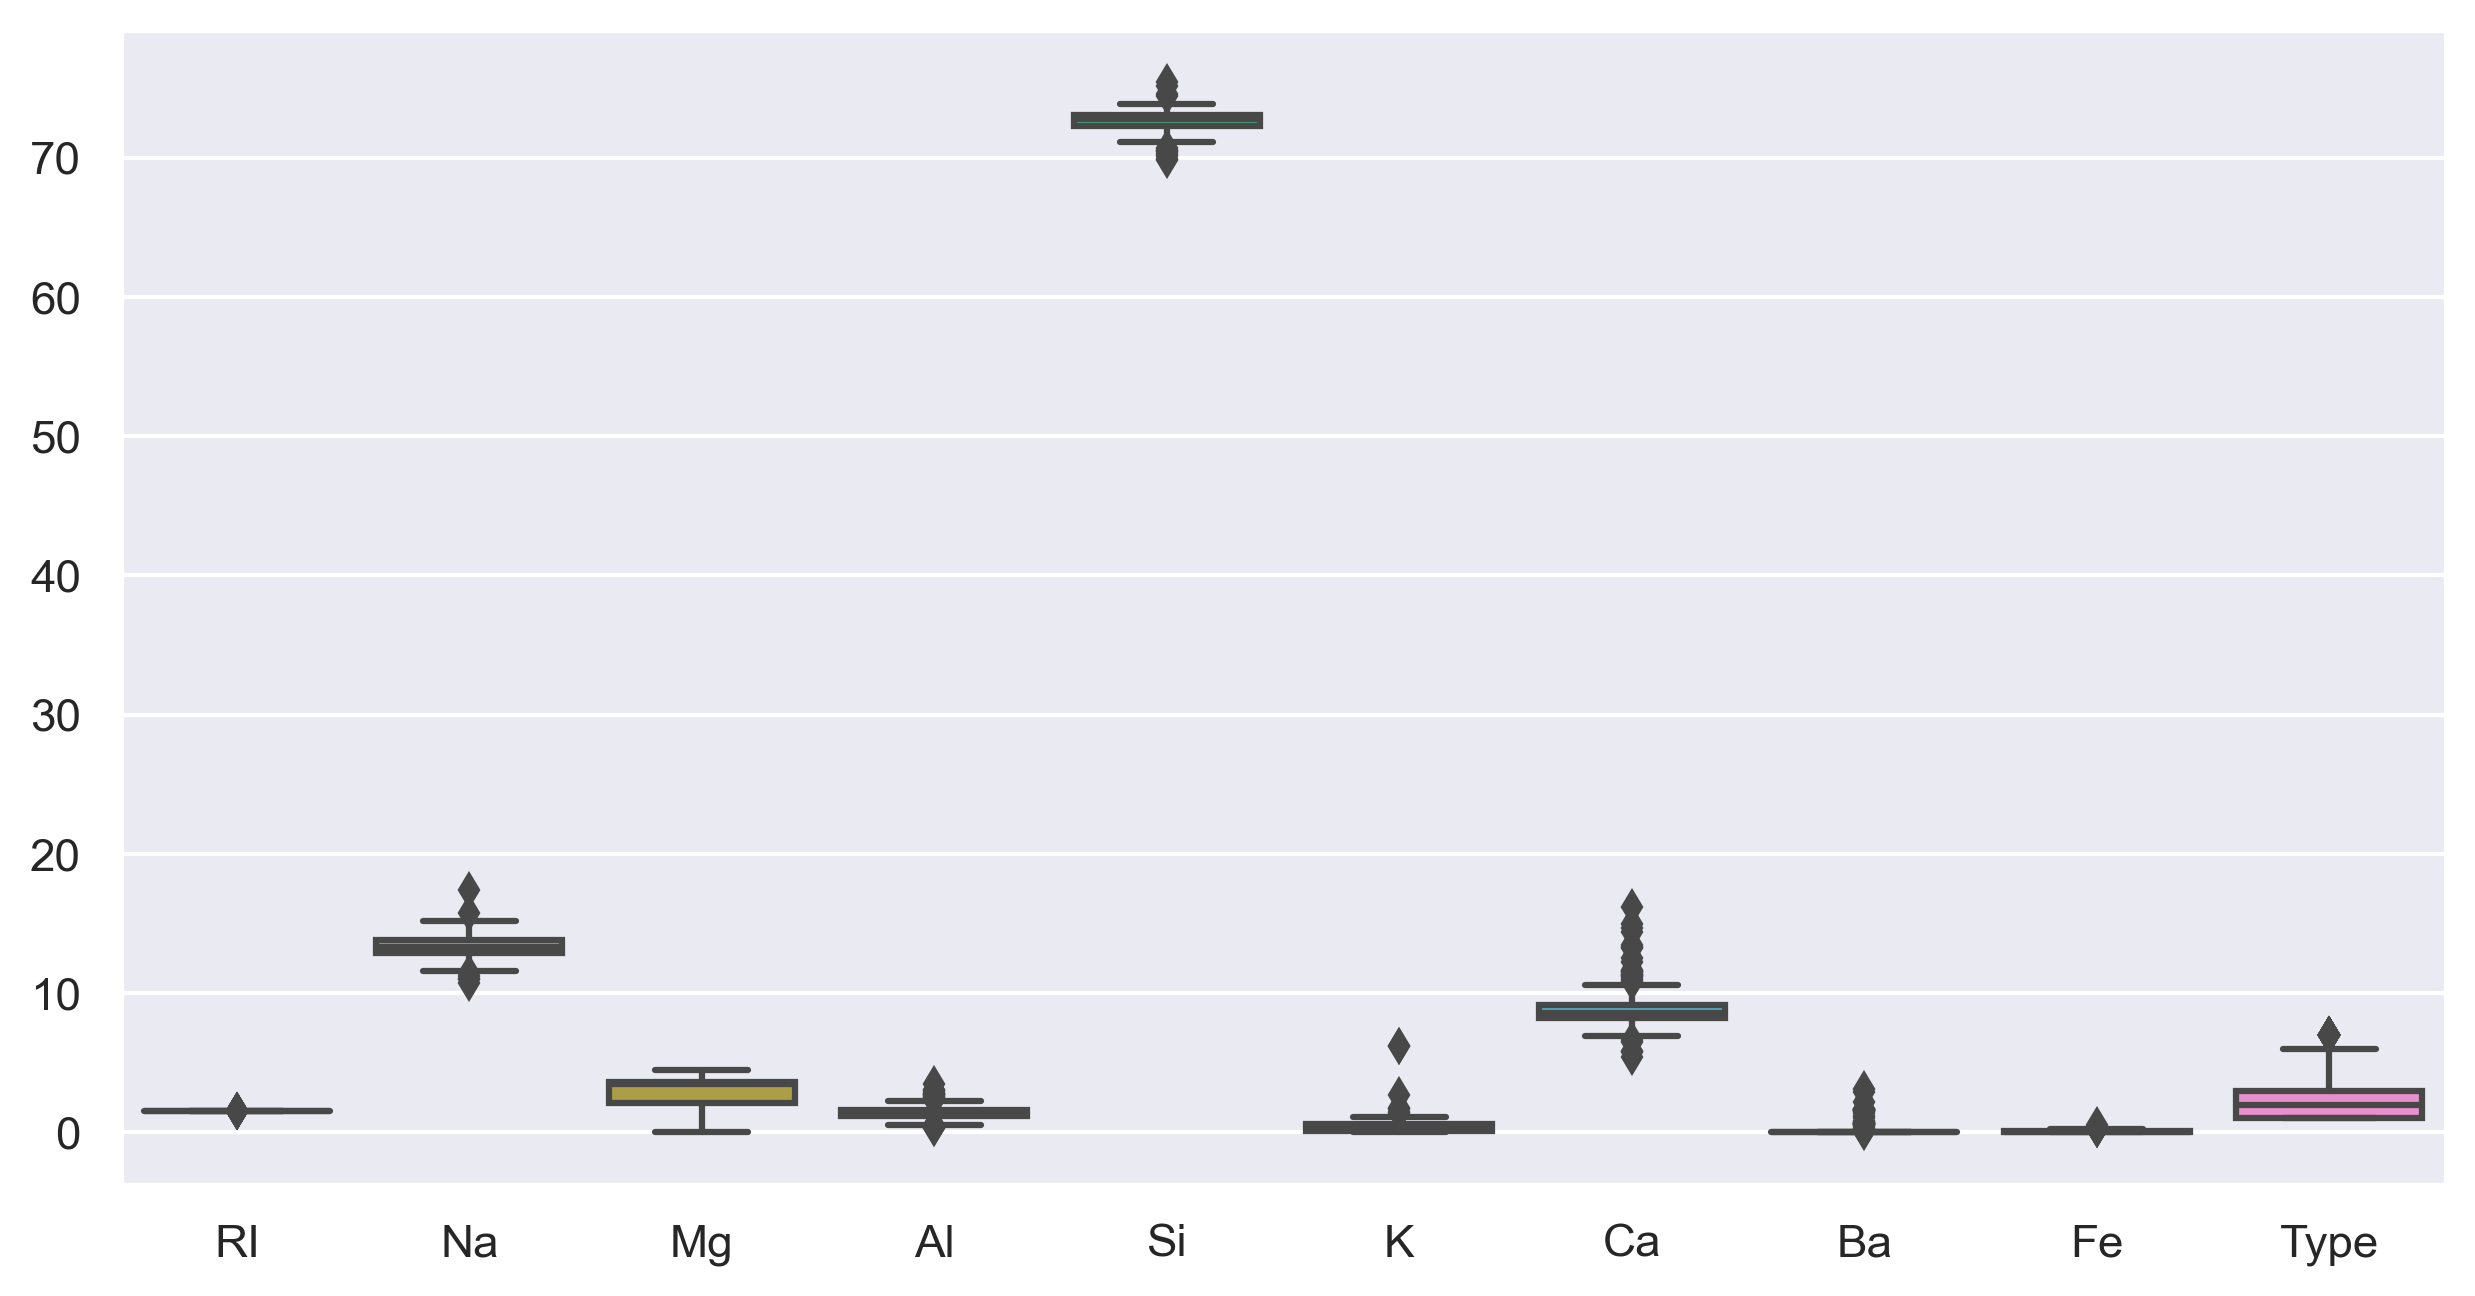

In [18]:
sns.boxplot(df)

In [19]:
df.duplicated().sum()

1

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Removing Duplicate Values

In [21]:
df.drop_duplicates(inplace = True)

In [22]:
df.shape

(213, 10)

# Model Building

# Standardizing the Data

In [23]:
df.iloc[:,:-1] = sc.fit_transform(df.iloc[:,:-1])
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,1
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,1
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,1
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,1
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301,7
210,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301,7
211,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301,7
212,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301,7


# Splitting the Data into Train & Test

In [24]:
x = df.iloc[:,:-1]
y = df['Type']

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size= 0.15, random_state= 42)

In [26]:
KNN = KNeighborsClassifier(n_neighbors= 3)

KNN.fit(xtrain,ytrain)
ypred = KNN.predict(xtest)
print("Training score :" , KNN.score(xtrain,ytrain))
print("Testing score :" , KNN.score(xtest,ytest))

Training score : 0.8232044198895028
Testing score : 0.75


In [27]:
# The model is not robust Lets try and Build one

# Hyper Parameter Tuning for KNN

In [28]:
train_score = []
test_score = []
ypred = []
for i in range(1,20):
    KNN = KNeighborsClassifier(n_neighbors= i)
    KNN.fit(xtrain,ytrain)
    train_score.append(KNN.score(xtrain, ytrain))
    test_score.append(KNN.score(xtest, ytest))
    ypred.append(KNN.predict(xtest))

In [29]:
train_score

[1.0,
 0.8342541436464088,
 0.8232044198895028,
 0.7845303867403315,
 0.7569060773480663,
 0.7182320441988951,
 0.712707182320442,
 0.6850828729281768,
 0.6961325966850829,
 0.7071823204419889,
 0.6850828729281768,
 0.6961325966850829,
 0.6850828729281768,
 0.6961325966850829,
 0.6629834254143646,
 0.6519337016574586,
 0.6519337016574586,
 0.6408839779005525,
 0.6408839779005525]

In [30]:
test_score

[0.6875,
 0.6875,
 0.75,
 0.75,
 0.71875,
 0.6875,
 0.71875,
 0.65625,
 0.625,
 0.625,
 0.625,
 0.65625,
 0.65625,
 0.625,
 0.625,
 0.625,
 0.59375,
 0.625,
 0.65625]

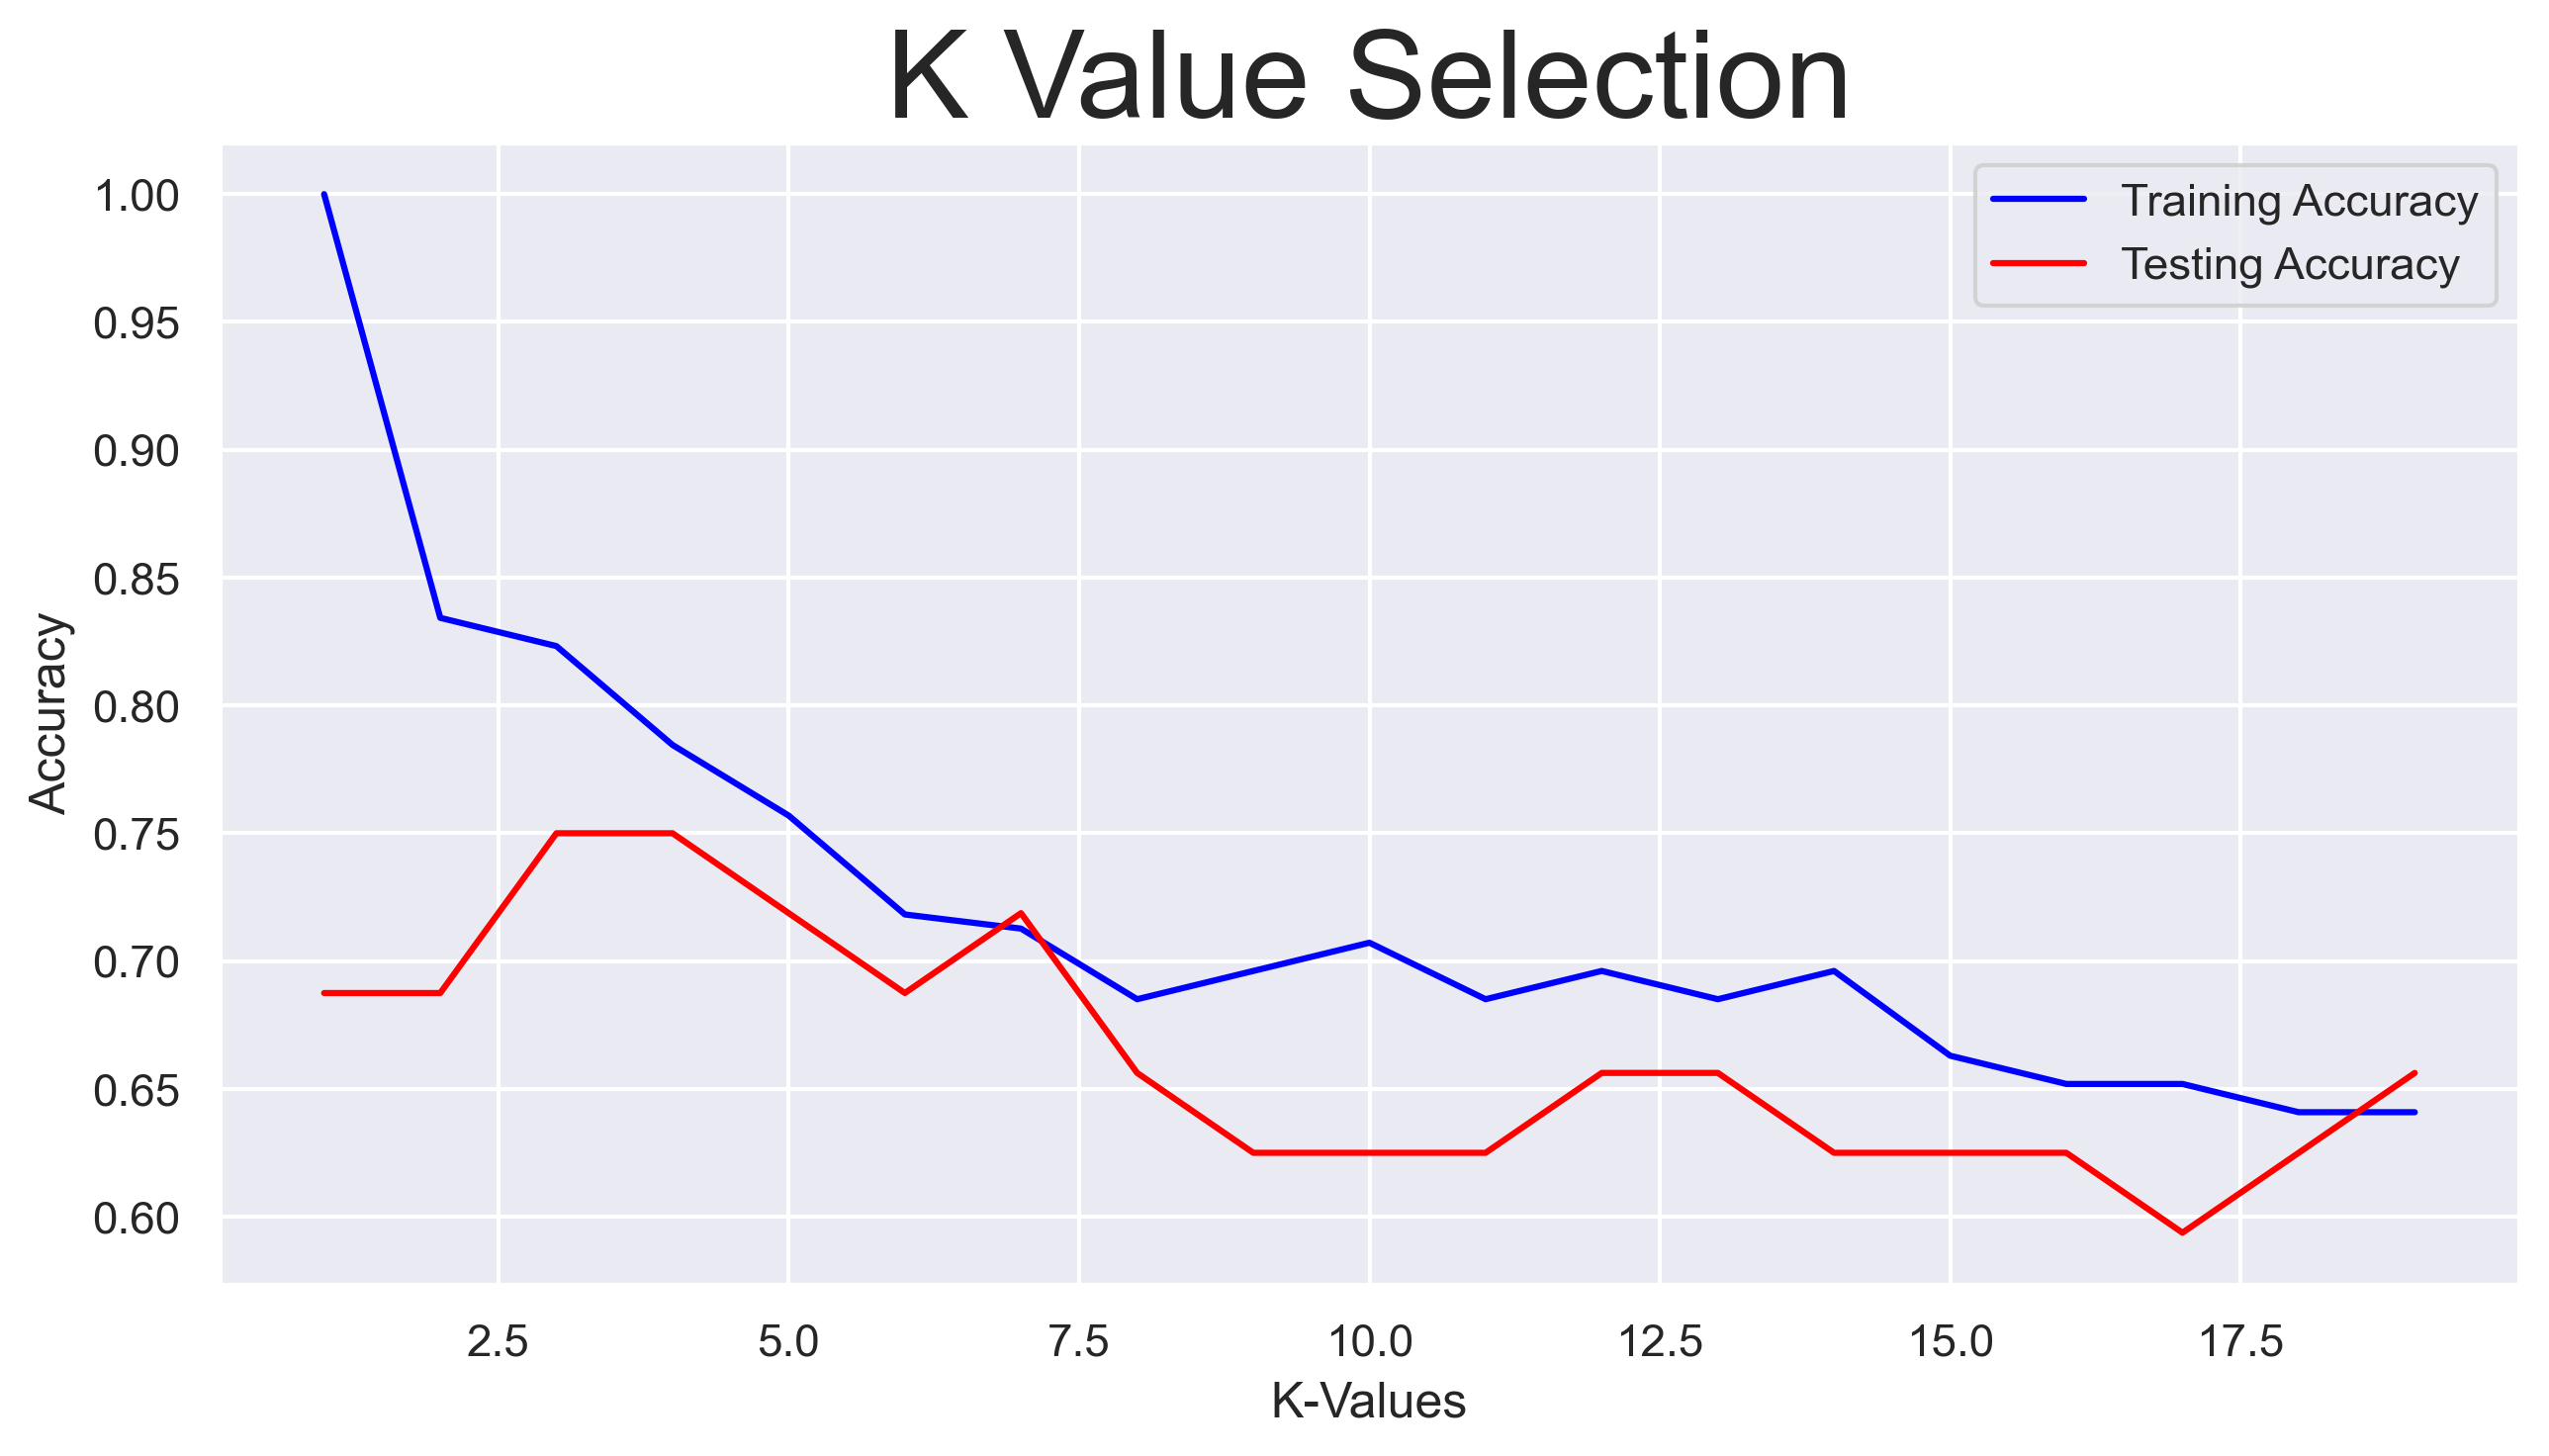

In [31]:
plt.plot(range(1,20), train_score, color = 'blue', label= 'Training Accuracy')
plt.plot(range(1,20), test_score, color = 'red', label= 'Testing Accuracy')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('K Value Selection', size =30)
plt.legend()

In [32]:
KNN = KNeighborsClassifier(n_neighbors= 4)

KNN.fit(xtrain,ytrain)
ypred = KNN.predict(xtest)
print("Training score :" , KNN.score(xtrain,ytrain))
print("Testing score :" , KNN.score(xtest,ytest))

Training score : 0.7845303867403315
Testing score : 0.75


In [33]:
# We have Created a Robust model